📊 Desafio 58 — Análise de Risco Cardiovascular
📂 Dataset: Clique aqui para baixar o CSV

Este conjunto de dados apresenta informações de pacientes, incluindo idade, IMC, nível de atividade física, tabagismo, colesterol e diagnóstico de hipertensão.

🔍 Tarefas:

Tratamento de Dados:
- Há valores atípicos no IMC? Utilize uma visualização como boxplot para investigar.

Análise Exploratória:
- Qual é a média de colesterol entre fumantes e não fumantes? Existe diferença relevante?

Visualização de Dados:
- Crie um gráfico de barras comparando a taxa de hipertensão por faixa etária (por exemplo: <30, 30–45, 46–60, >60).

Machine Learning:
- Treine um modelo simples (LogisticRegression ou RandomForestClassifier) para prever o diagnóstico de hipertensão com base nas outras variáveis. Avalie com accuracy_score e classification_report.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [65]:
df = pd.read_csv("dia_58_saude_pacientes.csv")
df.head()

,Paciente_ID,Idade,Sexo,IMC,Atividade_Fisica_Semanal,Fumante,Colesterol,Diagnóstico_Hipertensão
0,1,53,Masculino,23.7,4,Não,161.6,Sim
1,2,50,Feminino,27.0,2,Sim,151.5,Não
2,3,41,Masculino,24.5,4,Não,219.7,Sim
3,4,43,Feminino,26.6,5,Não,202.3,Não
4,5,32,Feminino,35.2,2,Não,174.1,Não


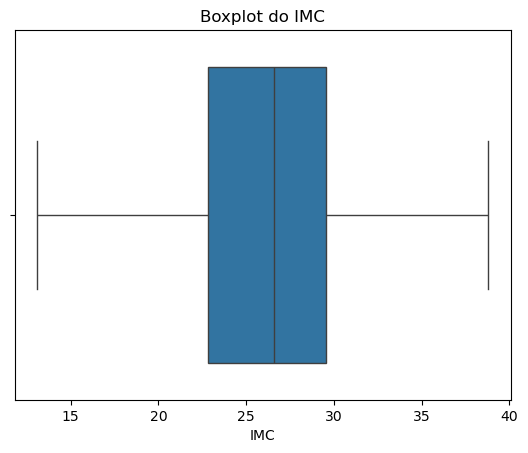

count    250.000000
mean      26.276400
std        4.899074
min       13.100000
25%       22.825000
50%       26.600000
75%       29.575000
max       38.800000
Name: IMC, dtype: float64

In [14]:
#Há valores atípicos no IMC? Utilize uma visualização como boxplot para investigar.
sns.boxplot(df, x="IMC")
plt.title('Boxplot do IMC')
plt.show()

df["IMC"].describe()

In [19]:
#Qual é a média de colesterol entre fumantes e não fumantes? Existe diferença relevante?
colesterol_media = df.groupby("Fumante")["Colesterol"].mean().round(2)
print(colesterol_media)

Fumante
Não    199.57
Sim    189.53
Name: Colesterol, dtype: float64


Diagnóstico_Hipertensão       Não       Sim
Faixas_idade                               
<30                      0.692308  0.307692
30–45                    0.650000  0.350000
46–60                    0.688525  0.311475
>60                      0.675325  0.324675


C:\Users\gabri\AppData\Local\Temp\ipykernel_12832\1883019465.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_hipertensao = df.groupby("Faixas_idade")["Diagnóstico_Hipertensão"].value_counts(normalize=True).unstack()


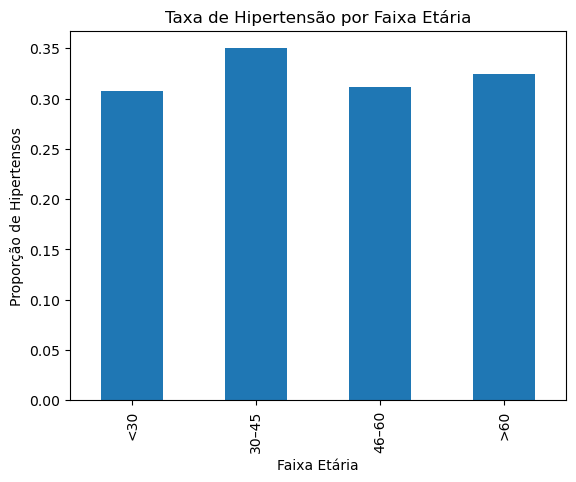

,Paciente_ID,Idade,Sexo,IMC,Atividade_Fisica_Semanal,Fumante,Colesterol,Diagnóstico_Hipertensão,Faixas_idade
0,1,53,Masculino,23.7,4,Não,161.6,Sim,46–60
1,2,50,Feminino,27.0,2,Sim,151.5,Não,46–60
2,3,41,Masculino,24.5,4,Não,219.7,Sim,30–45
3,4,43,Feminino,26.6,5,Não,202.3,Não,30–45
4,5,32,Feminino,35.2,2,Não,174.1,Não,30–45


In [67]:
#Crie um gráfico de barras comparando a taxa de hipertensão por faixa etária (por exemplo: <30, 30–45, 46–60, >60).
df["Faixas_idade"] = pd.cut(df["Idade"], bins=[0, 30, 45, 60, 200], labels=["<30", "30–45", "46–60", ">60"])
taxa_hipertensao = df.groupby("Faixas_idade")["Diagnóstico_Hipertensão"].value_counts(normalize=True).unstack()
print(hipertensao_taxa)

taxa_hipertensao["Sim"].plot(kind="bar")
plt.title("Taxa de Hipertensão por Faixa Etária")
plt.ylabel("Proporção de Hipertensos")
plt.xlabel("Faixa Etária")
plt.show()

In [71]:
#Treine um modelo simples (LogisticRegression ou RandomForestClassifier) para prever o diagnóstico de hipertensão com base nas outras variáveis. 
#Avalie com accuracy_score e classification_report.

le = LabelEncoder()
for col in ["Sexo", "Fumante", "Diagnóstico_Hipertensão"]:
    df[col] = le.fit_transform(df[col])

X = df.drop(["Diagnóstico_Hipertensão", "Paciente_ID", "Faixas_idade"], axis=1)
y = df["Diagnóstico_Hipertensão"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Acurácia: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        58
           1       0.40      0.35      0.38        17

    accuracy                           0.73        75
   macro avg       0.61      0.60      0.60        75
weighted avg       0.72      0.73      0.73        75

